In [134]:
print("Alô Mundo!!")

Alô Mundo!!


In [135]:
! pip install sqlalchemy

In [136]:
import pandas as pd

In [137]:
# Módulo
from sqlalchemy import  create_engine

In [138]:
! pip install pymysql

In [139]:
import pymysql

In [140]:

import pymysql
import urllib.parse
# definir as credenciais 
user = 'root'
password = urllib.parse.quote_plus('senai@123')
host = 'localhost'
database='schooltracker'
# criar uma url de conexão 
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'
# criar a conexão com o create_engine()
engine = create_engine(connection_string)
# escrever uma consulta SQL
query_alunos = "SELECT * FROM aluno"
query_diarios = "SELECT * FROM diariobordo"
query_avaliacao = " SELECT * FROM avaliacao"
# criar dataframe
df_alunos = pd.read_sql(query_alunos,engine)
df_diarios = pd.read_sql(query_diarios,engine)
df_avaliacao = pd.read_sql(query_avaliacao,engine)
# mostrar os cinco primeiros
df_alunos.head()

,id,ra,Nome,Tempo_de_Estudo,Renda_Media_Salarial_Familiar
0,7,00034548,None,NaN,NaN
1,8,00034549,None,NaN,NaN
2,9,00034550,None,NaN,NaN
3,10,00034551,None,NaN,NaN
4,11,00034552,None,NaN,NaN


## Quais bibliotecas um cientista de dados utiliza?


- Pandas
- NumPy
- Fundamentos de IA (Scikit-Learn)

- Material Didático
- Pandas e NumPy (Notebook)
- Scikit-Learn (Apostila do SENAI)


### PANDAS: ciência de dados
### SCKIT-LEARN:  elaboração de modelos de IA
### NUMPY: matemática

# 05/08/24

- Carregar dados(ok)

- Salvar um dataframe

In [141]:
csv_filename = 'alunos.csv'
df_alunos.to_csv(csv_filename, index=False)

# Eu salvei o dataframe!

# Exercício - Salve o DataFrame no formato JSON

In [142]:
csv_filename = 'alunos.json'
df_alunos.to_json(csv_filename, index=False)

In [143]:
! pip install openpyxl

In [144]:
csv_filename = 'planilha_alunos.xlsx'
df_alunos.to_excel(csv_filename, index=False)

# Um novo DataFrame

In [145]:
df_alunos.columns

Index(['id', 'ra', 'Nome', 'Tempo_de_Estudo', 'Renda_Media_Salarial_Familiar'], dtype='object')

In [146]:
df_tempo_renda = df_alunos[['Tempo_de_Estudo', 'Renda_Media_Salarial_Familiar']]
df_tempo_renda

,Tempo_de_Estudo,Renda_Media_Salarial_Familiar
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
97,4.0,4171.25
98,2.0,6914.47
99,8.0,8125.69
100,3.0,2561.36


## Tipos

In [147]:
print(type(df_tempo_renda))

<class 'pandas.core.frame.DataFrame'>


## Exercício: crie um recurso para mostrar apenas uma coluna. Mostre qual tipo desse recurso.

In [148]:
serie_tempo_renda = df_tempo_renda['Renda_Media_Salarial_Familiar']

In [149]:
type(serie_tempo_renda)

pandas.core.series.Series

## Revisando Funções Básicas

- Exercício 01: retorne o dataframe da última aula com as duas primeiras linhas como amostras.

In [150]:
df_tempo_renda.head(2)

,Tempo_de_Estudo,Renda_Media_Salarial_Familiar
0,NaN,NaN
1,NaN,NaN


- Exercício 02: agora retorne as duas últimas linhas da amostra.

In [151]:
df_tempo_renda.tail(2)

,Tempo_de_Estudo,Renda_Media_Salarial_Familiar
100,3.0,2561.36
101,1.0,4765.48


- Exercício 3: retorne uma tupla com número de linhas e colunas

In [152]:
df_tempo_renda.shape

(102, 2)

- Exercício 4: retorne as informações gerais do dataframe.

In [153]:
df_tempo_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tempo_de_Estudo                49 non-null     float64
 1   Renda_Media_Salarial_Familiar  49 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [154]:
qtde = len(df_tempo_renda)
if qtde <= 102:
    print(f'quantidade: {qtde} é ideal')

quantidade: 102 é ideal


- Exercício 05: retorne colunas

In [155]:
df_tempo_renda.columns

Index(['Tempo_de_Estudo', 'Renda_Media_Salarial_Familiar'], dtype='object')

- Exercício 06: retorne as informações apenas da coluna rendafamiliar

In [156]:
df_tempo_renda['Renda_Media_Salarial_Familiar'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102 entries, 0 to 101
Series name: Renda_Media_Salarial_Familiar
Non-Null Count  Dtype  
--------------  -----  
49 non-null     float64
dtypes: float64(1)
memory usage: 948.0 bytes


- Exercício 07: Mostre os tipos com dtypes

In [157]:
df_alunos.dtypes

id                                 int64
ra                                object
Nome                              object
Tempo_de_Estudo                  float64
Renda_Media_Salarial_Familiar    float64
dtype: object

- Estatística

In [158]:
df_alunos.describe()

,id,Tempo_de_Estudo,Renda_Media_Salarial_Familiar
count,102.000000,49.000000,49.000000
mean,57.500000,4.693878,4644.281429
std,29.588849,2.510014,2259.802832
min,7.000000,1.000000,1417.000000
25%,32.250000,3.000000,2690.520000
50%,57.500000,5.000000,4271.350000
75%,82.750000,7.000000,6914.470000
max,108.000000,9.000000,9314.250000


- DataFrame diario de bordo

- Gerar csv

In [159]:
csv_diariob = 'diarios.csv'
df_diarios.to_csv(csv_diariob, index=False)

- Gerar json

In [160]:
csv_diariob = 'diario.json'
df_diarios.to_json(csv_diariob, index=False)

In [161]:
df_diarios.head()

,id,texto,datahora,fk_aluno_id
0,9,Participou das aulas de matemática e português...,2024-07-30 08:30:00,7
1,10,Aulas de ciências e história. Contribuiu com p...,2024-07-31 09:00:00,7
2,11,Fez a prova de matemática com bom desempenho. ...,2024-07-30 10:00:00,8
3,12,Aulas de educação física e artes. Mostrou gran...,2024-07-31 11:00:00,8
4,13,Participou das aulas de matemática e português...,2024-07-30 08:30:00,9


In [162]:
df_diarios.tail(2)

,id,texto,datahora,fk_aluno_id
22,52,"Na aula de biologia, estudamos a estrutura das...",2024-08-09 11:00:00,12
23,53,Participamos de um debate sobre mudanças climá...,2024-08-10 12:00:00,15


In [163]:
df_diarios.shape

(24, 4)

In [164]:
df_diarios.dtypes

id                      int64
texto                  object
datahora       datetime64[ns]
fk_aluno_id             int64
dtype: object

In [165]:
df_diarios.columns

Index(['id', 'texto', 'datahora', 'fk_aluno_id'], dtype='object')

In [166]:
df_diarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           24 non-null     int64         
 1   texto        24 non-null     object        
 2   datahora     24 non-null     datetime64[ns]
 3   fk_aluno_id  24 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 900.0+ bytes


In [167]:
df_diarios['texto'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 24 entries, 0 to 23
Series name: texto
Non-Null Count  Dtype 
--------------  ----- 
24 non-null     object
dtypes: object(1)
memory usage: 324.0+ bytes


In [168]:
df_diarios['datahora']

0    2024-07-30 08:30:00
1    2024-07-31 09:00:00
2    2024-07-30 10:00:00
3    2024-07-31 11:00:00
4    2024-07-30 08:30:00
5    2024-07-31 09:00:00
6    2024-07-31 17:48:00
7    2024-07-30 08:30:00
8    2024-07-31 09:00:00
9    2024-07-30 10:00:00
10   2024-07-31 11:00:00
11   2024-07-30 08:30:00
12   2024-07-31 09:00:00
13   2024-07-31 17:48:00
14   2024-08-01 10:00:00
15   2024-08-02 11:30:00
16   2024-08-03 09:00:00
17   2024-08-04 14:00:00
18   2024-08-05 16:00:00
19   2024-08-06 13:00:00
20   2024-08-07 10:30:00
21   2024-08-08 15:00:00
22   2024-08-09 11:00:00
23   2024-08-10 12:00:00
Name: datahora, dtype: datetime64[ns]

In [169]:
df_diarios['texto']

0     Participou das aulas de matemática e português...
1     Aulas de ciências e história. Contribuiu com p...
2     Fez a prova de matemática com bom desempenho. ...
3     Aulas de educação física e artes. Mostrou gran...
4     Participou das aulas de matemática e português...
5     Aulas de ciências e história. Contribuiu com p...
6     Hoje aprendi a inserir dados na tabela com o c...
7     Participou das aulas de matemática e português...
8     Aulas de ciências e história. Contribuiu com p...
9     Fez a prova de matemática com bom desempenho. ...
10    Aulas de educação física e artes. Mostrou gran...
11    Participou das aulas de matemática e português...
12    Aulas de ciências e história. Contribuiu com p...
13    Hoje aprendi a inserir dados na tabela com o c...
14    Hoje aprendemos sobre as equações de segundo g...
15    A aula de hoje foi sobre a Revolução Francesa....
16    Estudamos reações químicas na aula de química ...
17    Na aula de inglês, lemos um conto de Edgar

In [170]:
df_avaliacao.head()

,id,nota1,nota2,nota3,nota4,fk_aluno_id
0,1,10,20,21,19,7
1,2,10,25,20,8,15
2,3,10,24,18,9,10
3,4,25,24,23,59,25


In [171]:
df_avaliacao.head(2)

,id,nota1,nota2,nota3,nota4,fk_aluno_id
0,1,10,20,21,19,7
1,2,10,25,20,8,15


In [172]:
df_avaliacao.tail(2)

,id,nota1,nota2,nota3,nota4,fk_aluno_id
2,3,10,24,18,9,10
3,4,25,24,23,59,25


In [173]:
df_avaliacao.dtypes

id             int64
nota1          int64
nota2          int64
nota3          int64
nota4          int64
fk_aluno_id    int64
dtype: object

In [174]:
df_avaliacao['nota1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: nota1
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 164.0 bytes


In [175]:
df_avaliacao.describe()

,id,nota1,nota2,nota3,nota4,fk_aluno_id
count,4.000000,4.00,4.000000,4.000000,4.00000,4.000000
mean,2.500000,13.75,23.250000,20.500000,23.75000,14.250000
std,1.290994,7.50,2.217356,2.081666,24.01909,7.889867
min,1.000000,10.00,20.000000,18.000000,8.00000,7.000000
25%,1.750000,10.00,23.000000,19.500000,8.75000,9.250000
50%,2.500000,10.00,24.000000,20.500000,14.00000,12.500000
75%,3.250000,13.75,24.250000,21.500000,29.00000,17.500000
max,4.000000,25.00,25.000000,23.000000,59.00000,25.000000


In [176]:
df_avaliacao['fk_aluno_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: fk_aluno_id
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 164.0 bytes


In [177]:
len(df_alunos)

102

In [178]:
len(df_diarios)

24

- Fatiamento

In [179]:
df_diarios[7:15]

,id,texto,datahora,fk_aluno_id
7,17,Participou das aulas de matemática e português...,2024-07-30 08:30:00,7
8,18,Aulas de ciências e história. Contribuiu com p...,2024-07-31 09:00:00,7
9,19,Fez a prova de matemática com bom desempenho. ...,2024-07-30 10:00:00,8
10,20,Aulas de educação física e artes. Mostrou gran...,2024-07-31 11:00:00,8
11,21,Participou das aulas de matemática e português...,2024-07-30 08:30:00,9
12,22,Aulas de ciências e história. Contribuiu com p...,2024-07-31 09:00:00,9
13,23,Hoje aprendi a inserir dados na tabela com o c...,2024-07-31 17:48:00,59
14,44,Hoje aprendemos sobre as equações de segundo g...,2024-08-01 10:00:00,10


- Vamos fazer um join?

### Passo para o merge

- Use o camando merge
- Criar uma variável - pode ser resultado o nome.
- pd.merge(dataframe1,dataframe2, tipo_uniao,qual a chave da direita, qual chave da esq.) - queremos unir
- Qual o tipo de uniao: how='inner'
- O parâmetro how define o tipo de join qu estamos realizando
- inner significa que queremos um join interno, o que resulta em apena as linhas que têm correspondência em ambos os DataFrames.

In [180]:
# Realizar o join
resultado = pd.merge(df_diarios,df_alunos, how='inner', left_on='fk_aluno_id', right_on='id')

# Selecionar as colunas desejadas
resultado_selecionado = resultado [['texto','datahora','ra']]

#Mostrar o resultado
resultado_selecionado.head()

,texto,datahora,ra
0,Participou das aulas de matemática e português...,2024-07-30 08:30:00,00034548
1,Aulas de ciências e história. Contribuiu com p...,2024-07-31 09:00:00,00034548
2,Fez a prova de matemática com bom desempenho. ...,2024-07-30 10:00:00,00034549
3,Aulas de educação física e artes. Mostrou gran...,2024-07-31 11:00:00,00034549
4,Participou das aulas de matemática e português...,2024-07-30 08:30:00,00034550


- Crie uma junção do dataframe aluno com avaliação. Mostre as notas e o RA do aluno.

In [181]:
uniao = pd.merge(df_avaliacao,df_alunos,how='inner',left_on='fk_aluno_id', right_on='id')

uniao_selecionada = uniao[['nota1','nota2','nota3','nota4','ra']]

uniao_selecionada.head()

,nota1,nota2,nota3,nota4,ra
0,10,20,21,19,00034548
1,10,25,20,8,00034556
2,10,24,18,9,00034551
3,25,24,23,59,00034566


## Pandas (funções agregadas)

## O Web scraping ou "raspagem de dados"

In [182]:
url = "https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/#google_vignette"
tabela_seriea = pd.read_html(url)
tabela_seriea

[    Times  Times.1                  Times.2  Times.3   P   J   V  E   D  GP  \
 0       1      NaN              Botafogo >>   Subiu1  43  21  13  4   4  35   
 1       2      NaN              Flamengo >>  Desceu1  40  20  12  4   4  34   
 2       3      NaN             Fortaleza >>   Subiu1  39  20  11  6   3  26   
 3       4      NaN             Palmeiras >>  Desceu1  37  21  11  4   6  28   
 4       5      NaN              Cruzeiro >>      NaN  35  20  11  2   7  29   
 5       6      NaN            SÃ£o Paulo >>      NaN  35  21  10  5   6  29   
 6       7      NaN                 Bahia >>      NaN  32  21   9  5   7  29   
 7       8      NaN          Athletico-PR >>      NaN  28  19   8  4   7  22   
 8       9      NaN          AtlÃ©tico-MG >>      NaN  28  19   7  7   5  28   
 9      10      NaN            Bragantino >>      NaN  26  19   7  5   7  24   
 10     11      NaN         Vasco da Gama >>      NaN  24  20   7  3  10  22   
 11     12      NaN             CriciÃºm

In [183]:
type(tabela_seriea)

list

In [184]:
tabela_brasileirao = tabela_seriea[0]
tabela_brasileirao

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
0,1,NaN,Botafogo >>,Subiu1,43,21,13,4,4,35,20,15,68
1,2,NaN,Flamengo >>,Desceu1,40,20,12,4,4,34,20,14,66
2,3,NaN,Fortaleza >>,Subiu1,39,20,11,6,3,26,19,7,65
3,4,NaN,Palmeiras >>,Desceu1,37,21,11,4,6,28,17,11,58
4,5,NaN,Cruzeiro >>,NaN,35,20,11,2,7,29,22,7,58
5,6,NaN,SÃ£o Paulo >>,NaN,35,21,10,5,6,29,21,8,55
6,7,NaN,Bahia >>,NaN,32,21,9,5,7,29,25,4,50
7,8,NaN,Athletico-PR >>,NaN,28,19,8,4,7,22,20,2,49
8,9,NaN,AtlÃ©tico-MG >>,NaN,28,19,7,7,5,28,28,0,49
9,10,NaN,Bragantino >>,NaN,26,19,7,5,7,24,23,1,45


In [185]:
tabela_seriea[0]

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
0,1,NaN,Botafogo >>,Subiu1,43,21,13,4,4,35,20,15,68
1,2,NaN,Flamengo >>,Desceu1,40,20,12,4,4,34,20,14,66
2,3,NaN,Fortaleza >>,Subiu1,39,20,11,6,3,26,19,7,65
3,4,NaN,Palmeiras >>,Desceu1,37,21,11,4,6,28,17,11,58
4,5,NaN,Cruzeiro >>,NaN,35,20,11,2,7,29,22,7,58
5,6,NaN,SÃ£o Paulo >>,NaN,35,21,10,5,6,29,21,8,55
6,7,NaN,Bahia >>,NaN,32,21,9,5,7,29,25,4,50
7,8,NaN,Athletico-PR >>,NaN,28,19,8,4,7,22,20,2,49
8,9,NaN,AtlÃ©tico-MG >>,NaN,28,19,7,7,5,28,28,0,49
9,10,NaN,Bragantino >>,NaN,26,19,7,5,7,24,23,1,45


In [186]:
tabela_seriea[0].head()

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
0,1,NaN,Botafogo >>,Subiu1,43,21,13,4,4,35,20,15,68
1,2,NaN,Flamengo >>,Desceu1,40,20,12,4,4,34,20,14,66
2,3,NaN,Fortaleza >>,Subiu1,39,20,11,6,3,26,19,7,65
3,4,NaN,Palmeiras >>,Desceu1,37,21,11,4,6,28,17,11,58
4,5,NaN,Cruzeiro >>,NaN,35,20,11,2,7,29,22,7,58


In [187]:
tabela_brasileirao.head()

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
0,1,NaN,Botafogo >>,Subiu1,43,21,13,4,4,35,20,15,68
1,2,NaN,Flamengo >>,Desceu1,40,20,12,4,4,34,20,14,66
2,3,NaN,Fortaleza >>,Subiu1,39,20,11,6,3,26,19,7,65
3,4,NaN,Palmeiras >>,Desceu1,37,21,11,4,6,28,17,11,58
4,5,NaN,Cruzeiro >>,NaN,35,20,11,2,7,29,22,7,58


In [188]:
tabela_brasileirao.tail()

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
15,16,NaN,Internacional >>,Desceu2,21,16,5,6,5,14,14,0,43
16,17,NaN,Fluminense >>,Subiu2,20,20,5,5,10,16,24,-8,33
17,18,NaN,Corinthians >>,Desceu3,20,21,4,8,9,19,28,-9,31
18,19,NaN,CuiabÃ¡ >>,Desceu1,17,19,4,5,10,19,25,-6,29
19,20,NaN,AtlÃ©tico Goianiense >>,NaN,12,21,2,6,13,17,35,-18,19


In [189]:
tabela_brasileirao.shape

(20, 13)

In [190]:
tabela_brasileirao.columns

Index(['Times', 'Times.1', 'Times.2', 'Times.3', 'P', 'J', 'V', 'E', 'D', 'GP',
       'GC', 'SG', '%'],
      dtype='object')

In [191]:
tabela_brasileirao['Times.2']

0                 Botafogo >>
1                 Flamengo >>
2                Fortaleza >>
3                Palmeiras >>
4                 Cruzeiro >>
5               SÃ£o Paulo >>
6                    Bahia >>
7             Athletico-PR >>
8             AtlÃ©tico-MG >>
9               Bragantino >>
10           Vasco da Gama >>
11               CriciÃºma >>
12               Juventude >>
13                 GrÃªmio >>
14                VitÃ³ria >>
15           Internacional >>
16              Fluminense >>
17             Corinthians >>
18                 CuiabÃ¡ >>
19    AtlÃ©tico Goianiense >>
Name: Times.2, dtype: object

In [198]:
tabela_brasileirao = tabela_brasileirao.drop(columns=['Times', 'Times.1', 'Times.3'])
tabela_brasileirao


,Times.2,P,J,V,E,D,GP,GC,SG,%
0,Botafogo >>,43,21,13,4,4,35,20,15,68
1,Flamengo >>,40,20,12,4,4,34,20,14,66
2,Fortaleza >>,39,20,11,6,3,26,19,7,65
3,Palmeiras >>,37,21,11,4,6,28,17,11,58
4,Cruzeiro >>,35,20,11,2,7,29,22,7,58
5,SÃ£o Paulo >>,35,21,10,5,6,29,21,8,55
6,Bahia >>,32,21,9,5,7,29,25,4,50
7,Athletico-PR >>,28,19,8,4,7,22,20,2,49
8,AtlÃ©tico-MG >>,28,19,7,7,5,28,28,0,49
9,Bragantino >>,26,19,7,5,7,24,23,1,45


In [199]:
tabela_brasileirao

,Times.2,P,J,V,E,D,GP,GC,SG,%
0,Botafogo >>,43,21,13,4,4,35,20,15,68
1,Flamengo >>,40,20,12,4,4,34,20,14,66
2,Fortaleza >>,39,20,11,6,3,26,19,7,65
3,Palmeiras >>,37,21,11,4,6,28,17,11,58
4,Cruzeiro >>,35,20,11,2,7,29,22,7,58
5,SÃ£o Paulo >>,35,21,10,5,6,29,21,8,55
6,Bahia >>,32,21,9,5,7,29,25,4,50
7,Athletico-PR >>,28,19,8,4,7,22,20,2,49
8,AtlÃ©tico-MG >>,28,19,7,7,5,28,28,0,49
9,Bragantino >>,26,19,7,5,7,24,23,1,45


In [203]:
tabela_brasileirao[['Times.2','V']]

,Times.2,V
0,Botafogo >>,13
1,Flamengo >>,12
2,Fortaleza >>,11
3,Palmeiras >>,11
4,Cruzeiro >>,11
5,SÃ£o Paulo >>,10
6,Bahia >>,9
7,Athletico-PR >>,8
8,AtlÃ©tico-MG >>,7
9,Bragantino >>,7


- Informações sobre o dataframe

In [204]:
tabela_brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Times.2  20 non-null     object
 1   P        20 non-null     int64 
 2   J        20 non-null     int64 
 3   V        20 non-null     int64 
 4   E        20 non-null     int64 
 5   D        20 non-null     int64 
 6   GP       20 non-null     int64 
 7   GC       20 non-null     int64 
 8   SG       20 non-null     int64 
 9   %        20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


- Estatística Descritiva 

In [205]:
tabela_brasileirao.describe()

,P,J,V,E,D,GP,GC,SG,%
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27.25000,19.800000,7.450000,4.900000,7.450000,24.000000,24.00000,0.000000,45.350000
std,8.57705,1.239694,3.051747,1.552587,2.723678,5.973626,5.30144,8.687559,13.468384
min,12.00000,16.000000,2.000000,2.000000,3.000000,14.000000,14.00000,-18.000000,19.000000
25%,21.00000,19.000000,5.000000,4.000000,5.750000,19.000000,20.00000,-6.500000,35.250000
50%,25.00000,20.000000,7.000000,5.000000,7.000000,23.500000,23.50000,0.000000,44.000000
75%,35.00000,21.000000,10.250000,6.000000,10.000000,28.250000,28.00000,7.000000,55.750000
max,43.00000,21.000000,13.000000,8.000000,13.000000,35.000000,35.00000,15.000000,68.000000


In [207]:
tabela_brasileirao['%']

0     68
1     66
2     65
3     58
4     58
5     55
6     50
7     49
8     49
9     45
10    40
11    42
12    38
13    36
14    33
15    43
16    33
17    31
18    29
19    19
Name: %, dtype: int64

In [208]:
tabela_brasileirao[['%']]

,%
0,68
1,66
2,65
3,58
4,58
5,55
6,50
7,49
8,49
9,45


- Média

In [209]:
tabela_brasileirao['%'].mean()

np.float64(45.35)

- Agrupar essa Coluna % com outra.

- Renomear Coluna

- Manipular string

In [210]:
tabela_brasileirao.rename(columns={'Times.2': 'Times'}, inplace=True)

In [211]:
tabela_brasileirao

,Times,P,J,V,E,D,GP,GC,SG,%
0,Botafogo >>,43,21,13,4,4,35,20,15,68
1,Flamengo >>,40,20,12,4,4,34,20,14,66
2,Fortaleza >>,39,20,11,6,3,26,19,7,65
3,Palmeiras >>,37,21,11,4,6,28,17,11,58
4,Cruzeiro >>,35,20,11,2,7,29,22,7,58
5,SÃ£o Paulo >>,35,21,10,5,6,29,21,8,55
6,Bahia >>,32,21,9,5,7,29,25,4,50
7,Athletico-PR >>,28,19,8,4,7,22,20,2,49
8,AtlÃ©tico-MG >>,28,19,7,7,5,28,28,0,49
9,Bragantino >>,26,19,7,5,7,24,23,1,45


#### Replace

- str.replace('>>','',regex=False):
  - substitui >> por uma string vazia

- regex=False
  - indica que >> é um texto literal, não uma expessão regular

- str.strip
  - para retirar espaços em branco no inicio e fim da tabela.

In [216]:
tabela_brasileirao['Times'] = tabela_brasileirao['Times'].str.replace('>>', '', regex=False).str.strip()

In [217]:
tabela_brasileirao

,Times,P,J,V,E,D,GP,GC,SG,%
0,Botafogo,43,21,13,4,4,35,20,15,68
1,Flamengo,40,20,12,4,4,34,20,14,66
2,Fortaleza,39,20,11,6,3,26,19,7,65
3,Palmeiras,37,21,11,4,6,28,17,11,58
4,Cruzeiro,35,20,11,2,7,29,22,7,58
5,SÃ£o Paulo,35,21,10,5,6,29,21,8,55
6,Bahia,32,21,9,5,7,29,25,4,50
7,Athletico-PR,28,19,8,4,7,22,20,2,49
8,AtlÃ©tico-MG,28,19,7,7,5,28,28,0,49
9,Bragantino,26,19,7,5,7,24,23,1,45


In [224]:
! pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 7.1 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.0 MB 7.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/8.0 MB 7.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 7.5 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 7.1 MB/s eta 0:00:01
   -------------------------------------- - 7.6/8.0 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 8

In [225]:
import matplotlib as plt

In [226]:
# grafico_percent = tabela_brasileirao.groupby('Times')[['%]],mean().sort_values('%)
grafico_percent = tabela_brasileirao.groupby('Times')['%'].sum().sort_values()

<Axes: xlabel='Times'>

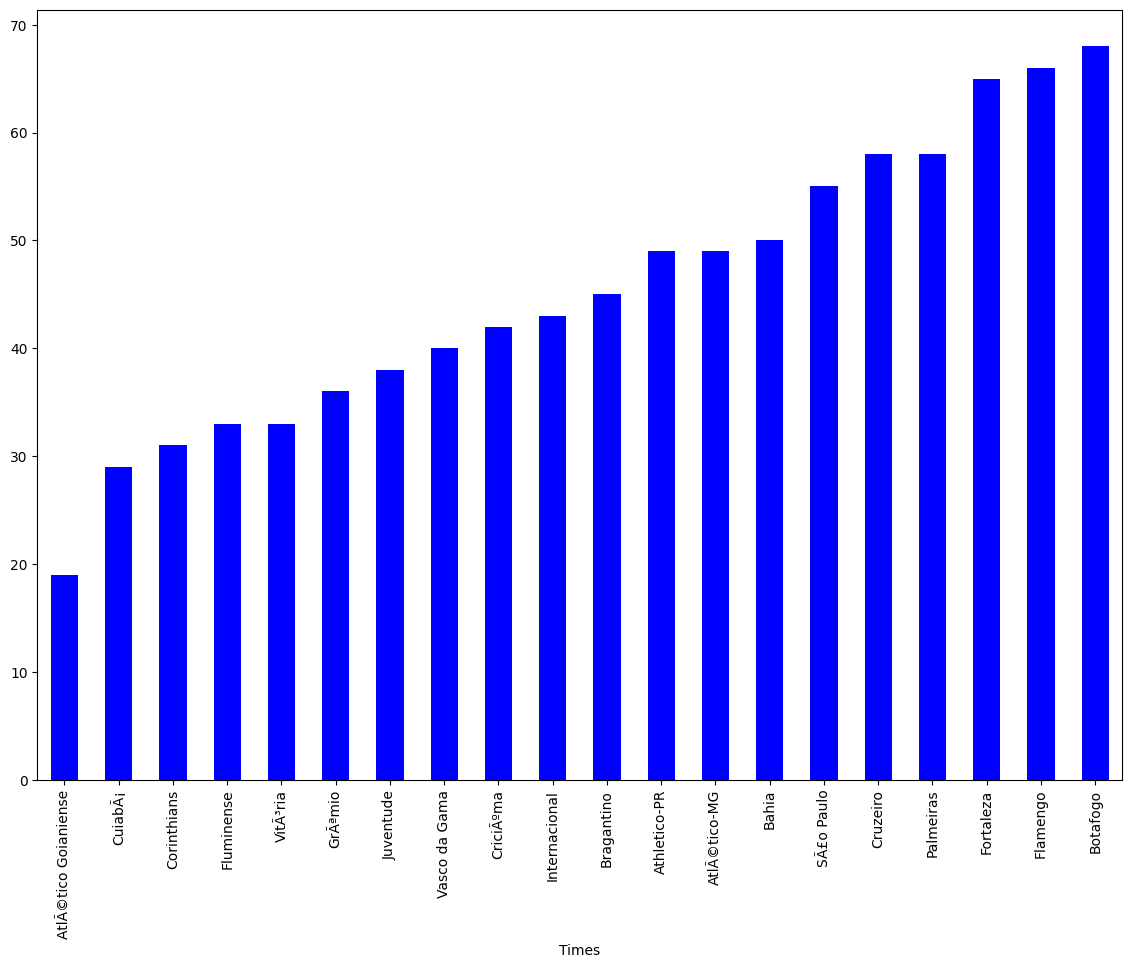

In [228]:
grafico_percent.plot(kind='bar', figsize=(14, 10), color='blue')

In [ ]:
! pip install lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------- -------------------- 1.8/3.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 9.9 MB/s eta 0:00:00


In [ ]:
! pip install html5lib

  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)


In [ ]:
! pip install beautifulsoup4

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)


In [ ]:
url = 'https://www.tuasaude.com/imc/'
tables = pd.read_html(url)
tables

[             IMC (kg/m²)       Classificação
 0         Menor que 18,5          Baixo peso
 1         De 18,5 a 24,9         Peso normal
 2           De 25 a 29,9           Sobrepeso
 3           De 30 a 34,9    Obesidade grau I
 4           De 35 a 39.9   Obesidade grau II
 5  Igual ou maior que 40  Obesidade grau III]

type